In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
data = {
    'edad': [25, 30, 45, 22, 55, 35, 60, 40, 50, 28],
    'ingresos': [50000, 60000, 90000, 40000, 110000, 75000, 120000, 80000, 100000, 55000],
    'compras_recientes': [3, 5, 2, 8, 1, 4, 0, 6, 2, 7],
    'comprara_producto': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Target: 0=No, 1=Sí
}

df = pd.DataFrame(data)

print("--- Vista previa de los datos ---")
display(df)
X = df.drop('comprara_producto', axis=1)
y = df['comprara_producto']

# 4. División en Set de Entrenamiento y Prueba
# Usamos un 30% para prueba dado que el dataset es pequeño (10 registros)
# random_state=42 asegura que el resultado sea reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nDatos de entrenamiento: {X_train.shape[0]} registros")
print(f"Datos de prueba: {X_test.shape[0]} registros")

--- Vista previa de los datos ---


,edad,ingresos,compras_recientes,comprara_producto
0,25,50000,3,0
1,30,60000,5,1
2,45,90000,2,0
3,22,40000,8,1
4,55,110000,1,0
5,35,75000,4,1
6,60,120000,0,0
7,40,80000,6,1
8,50,100000,2,0
9,28,55000,7,1



Datos de entrenamiento: 7 registros
Datos de prueba: 3 registros


In [ ]:
arbol = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)
arbol.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


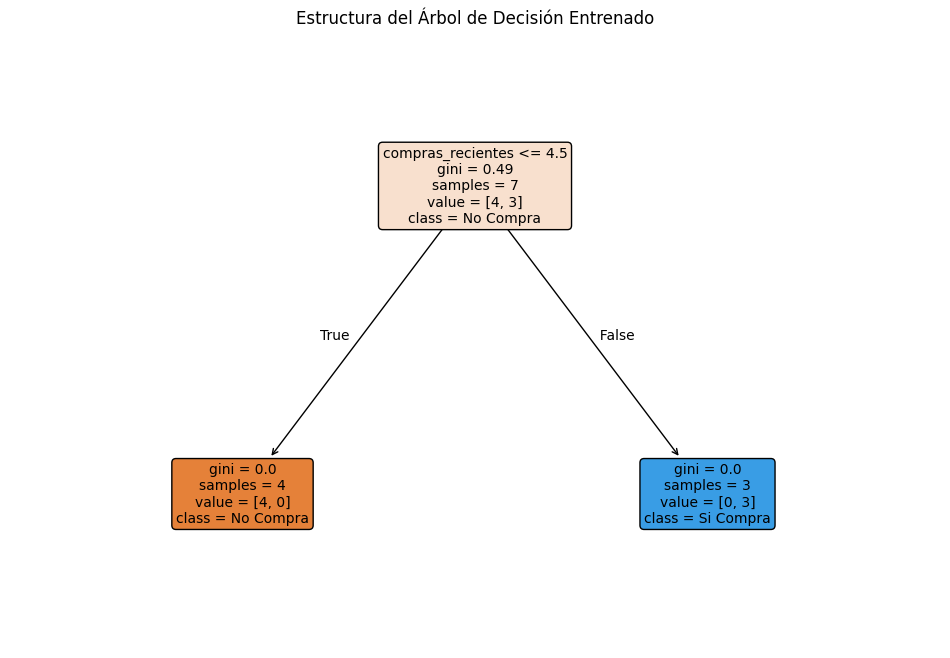

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(arbol,
          feature_names=X.columns,
          class_names=['No Compra', 'Si Compra'],
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Estructura del Árbol de Decisión Entrenado")
plt.show()

In [ ]:
y_pred = arbol.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
reporte = classification_report(y_test, y_pred, target_names=['No Compra', 'Si Compra'])

print(f"Exactitud (Accuracy): {exactitud:.2f} (o {exactitud*100}%)")
print("\n--- Reporte de Clasificación ---")
print(reporte)
print("\nComparación Real vs Predicción:")
comparativa = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
print(comparativa)

Exactitud (Accuracy): 0.67 (o 66.66666666666666%)

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

   No Compra       0.50      1.00      0.67         1
   Si Compra       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3


Comparación Real vs Predicción:
   Real  Predicción
8     0           0
1     1           1
5     1           0
